# Week 4 Solutions
## Exercise 1
Plot the distribution of survival time for all patients, and use the *bins* parameter to change the granularity of the distribution

In [1]:
import numpy as np
import pandas as pd
import plotnine as p9

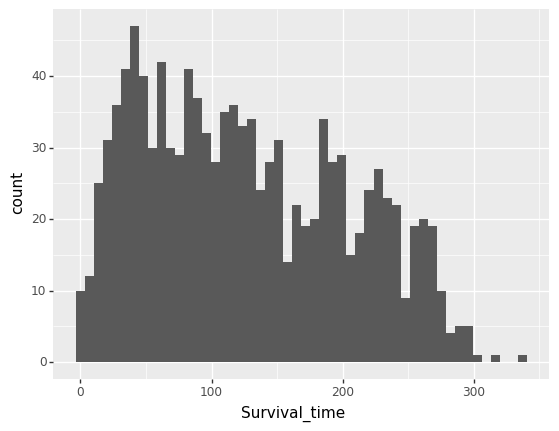

<ggplot: (-9223371864200564276)>

In [2]:
# read in data
metabric = pd.read_csv("../data/metabric_clinical_and_expression_data.csv").dropna()
# plot histogram
(
p9.ggplot(metabric, p9.aes("Survival_time"))
    + p9.geom_histogram(bins=50)
)

## Exercise 2
Amend your code from exercise 1 to create interleaved distributions of survival time for ER positive and ER negative tumours.

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 14'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


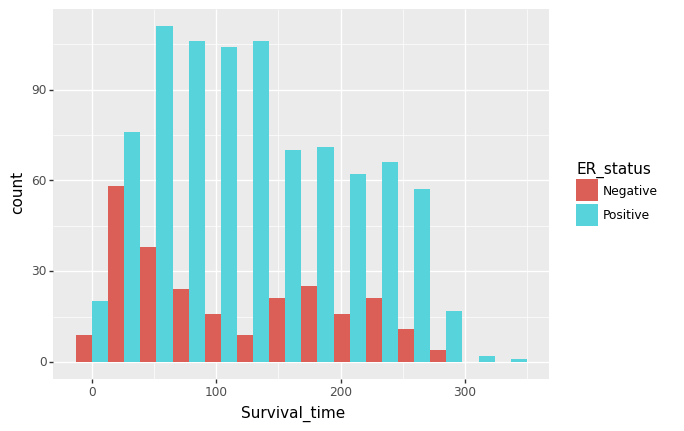

<ggplot: (-9223371864200648804)>

In [3]:
# read in data
metabric = pd.read_csv("../data/metabric_clinical_and_expression_data.csv").dropna()
metabric.dtypes
# interleaved histograms of survival time for ER- and ER+
(
p9.ggplot(metabric, p9.aes("Survival_time", fill="ER_status"))
    + p9.geom_histogram(position="dodge")
)

## Exercise 3
Generate a boxplot to compare survival time between different cancer types, incorporating the following features:
1. Add points behind the boxes to show the raw data points
2. Colour the boxes by Cancer type
3. Separate the plot into individual facets for ER+ and ER-
4. Rename the x axis to "Type of cancer"
5. Rename the y axis to "Survival time (months)"
6. Use a theme that removes the background colour and gridlines
7. Remove the legend title
8. Remove the X axis labels

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\stat.py:311: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:634: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(lst, axis=axis, ignore_index=True)
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\themes\theme.py:250: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  rcParams[key] = val
C:\Prog

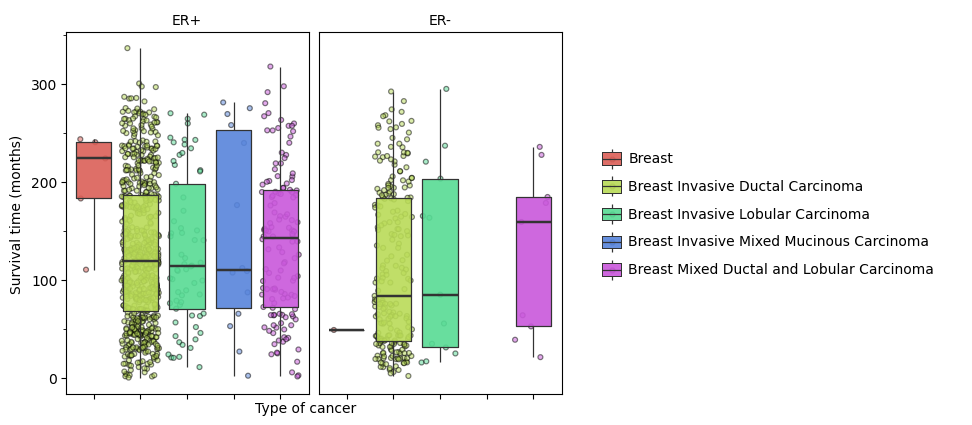

<ggplot: (-9223371864200344216)>

In [4]:
# change the ER status values to give more informative facet titles in the plot
metabric["ER_status"] = metabric["ER_status"].replace("Positive", "ER+").replace("Negative", "ER-")

# generate the boxplot
(
# colouring by cancer type by passing Cancer_type to fill
p9.ggplot(metabric, p9.aes("Cancer_type", "Survival_time", fill="Cancer_type"))
    # plot the points, using geom_jitter to minimise overlaps
    + p9.geom_jitter(alpha=0.5)
    # plot the boxes
    + p9.geom_boxplot(alpha=0.9)
    # separate the plot into facets
    + p9.facet_wrap("~ER_status")
    # rename the x axis
    + p9.xlab("Type of cancer")
    # rename the y axis
    + p9.ylab("Survival time (months)")
    # specify theme to remove background colour and gridlines
    + p9.theme_matplotlib()
    + p9.theme(
        # remove the legend title
        legend_title = p9.element_blank(),
        # suppress the x axis labels
        axis_text_x = p9.element_blank(),
        # remove the background from the facet titles
        strip_background = p9.element_blank()
    )
)